# Make Figure-PTEN-1B:  Uniqueness of trans effect

Create a bar/dumbell plot to look at the number of genes that are significant in one or multiple cancers. 

Imports.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u
import plot_utils as p

# Step 1: Create sig column 

The sig column names all cancers with a sig comparison for the specific gene. First, get a df with p-values and differential expressions for all proteins across all 8 cancers.

In [2]:
all_df = pd.read_csv("../Make_Tables/csv/all_proteins.csv")
all_df

,Proteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Lscc_P_Value,Lscc_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,Endo_P_Value,Endo_Median,Colon_P_Value,Colon_Median
0,ARMH3,5.766739e-07,-0.405134,0.024047,-0.135941,0.222235,-0.37845,0.906857,-0.27970,NaN,NaN,NaN,NaN,0.034811,0.1503,NaN,NaN
1,CUTC,8.514758e-07,-0.553255,0.014672,-0.314307,0.056523,-1.01995,0.568489,-0.44585,0.349469,-0.48080,0.985704,-0.159424,0.330823,-0.2533,0.917530,-0.08210
2,CUL2,2.783477e-06,-0.586396,0.677585,0.017886,0.868772,0.05695,0.999848,0.04745,0.665878,0.17195,0.991659,0.033091,0.957970,0.0232,0.902073,-0.07690
3,PIP4K2A,2.783477e-06,-0.838882,0.038186,-0.224713,0.847730,0.04535,0.999848,0.24750,0.670623,-0.07435,0.985704,0.052955,0.502967,0.1690,0.883481,0.10135
4,GDI2,2.783477e-06,-0.610188,0.827100,0.001559,NaN,NaN,0.999848,-0.03735,0.789708,0.14995,0.985704,-0.067389,0.283190,0.1286,0.999502,-0.04450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,WTH3DI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.40100
15407,ZBED6CL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.11370
15408,ZIC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00200
15409,ZNF419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38150


In [4]:
# create sig column values to show cancers with sig tests for each gene
for index, row in all_df.iterrows():
    cancer_names = ['Gbm','Hnscc','Luad','Lscc','Brca','Ov','Endo','Colon']
    label = []
    for cancer in cancer_names:
        if row[cancer+'_P_Value'] < 0.05:
            label.append(str(cancer))
    labeled = '_'.join(label)
    all_df.loc[index,'sig'] = str(labeled)
all_df[['Proteomics', 'sig']].head()

,Proteomics,sig
0,ARMH3,Gbm_Hnscc_Endo
1,CUTC,Gbm_Hnscc
2,CUL2,Gbm
3,PIP4K2A,Gbm_Hnscc
4,GDI2,Gbm


# Step 2: Keep genes significant in at least one cancer

First create the numSig column that counts the number of cancers with a significant test for the specific gene. 

In [5]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05: 
            numSig += 1
            
    return numSig

In [6]:
all_df["Num_sig"] = all_df.loc[:,["Gbm_P_Value","Hnscc_P_Value","Luad_P_Value","Lscc_P_Value", "Brca_P_Value","Ov_P_Value","Endo_P_Value","Colon_P_Value"]].apply(Pvalue_sig, axis = 1)
all_df = all_df.sort_values(by=['Num_sig'],ascending=False)

#Keep trans genes that are significant in atleast 1 cancer. 
all_df1 = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
all_df1.head()


,Proteomics,Gbm_P_Value,Gbm_Median,Hnscc_P_Value,Hnscc_Median,Luad_P_Value,Luad_Median,Lscc_P_Value,Lscc_Median,Brca_P_Value,Brca_Median,Ov_P_Value,Ov_Median,Endo_P_Value,Endo_Median,Colon_P_Value,Colon_Median,sig,Num_sig
0,ARMH3,5.766739e-07,-0.405134,0.024047,-0.135941,0.222235,-0.37845,0.906857,-0.27970,NaN,NaN,NaN,NaN,0.034811,0.150300,NaN,NaN,Gbm_Hnscc_Endo,3
1621,FXR1,3.788655e-02,0.212693,0.029456,0.363027,0.968398,0.00225,0.999848,0.42770,0.933714,-0.09970,0.985704,-0.035290,0.008873,-0.316200,0.987216,0.00550,Gbm_Hnscc_Endo,3
909,LSG1,1.454462e-02,0.260645,0.039944,0.336274,0.960994,0.04570,0.999848,0.51445,0.573556,0.37630,0.985704,-0.211582,0.002564,-0.202589,0.983382,-0.08800,Gbm_Hnscc_Endo,3
1481,CORO1A,3.343957e-02,-0.557922,0.033231,-0.454549,0.043364,-1.26555,0.999848,-0.12010,0.736200,-0.44910,0.985704,0.110334,0.640847,-0.296000,0.901656,-0.11410,Gbm_Hnscc_Luad,3
134,RAB8B,1.608872e-03,-0.446976,0.023883,-0.376723,0.027098,-0.75010,0.999848,0.21995,0.923055,0.03295,0.991931,-0.010445,0.972666,0.341000,0.931817,0.00005,Gbm_Hnscc_Luad,3


# Step 3: Get df with total counts of significant genes

Get count of sig genes for each unique label of a single cancer or multiple cancers in the sig column. 
* NOTE: Lscc has 3 significant genes that are also significnat in other cancers. They are only counted in the overlapping columns and Lscc alone shows 0 unique genes. (See columns: Gbm_Hnscc_Lscc, Gbm_Lscc, Luad_Lscc) 

In [10]:
# Count the number of unique values in sig
vc = all_df1['sig'].value_counts()
df = vc.to_frame()

# Add cancers with no significant genes.
no_sig = {'Colon': 0, 'Brca': 0, 'Lscc': 0, 'Ov': 0}
ns_df = pd.DataFrame.from_dict(no_sig, orient = 'index', columns=['sig'])

# Append
both = df.append(ns_df)
both = both.reset_index()
both = both.rename(columns = {'index': 'cancer'})

# Reindex to keep single cancers together
s = [0,1,2,5,19,18,17,16,3,4,6,7,8,9,10,11,12,13,14,15]
both = both.reindex(s)
both

,cancer,sig
0,Gbm,1622
1,Hnscc,353
2,Endo,275
5,Luad,48
19,Ov,0
18,Lscc,0
17,Brca,0
16,Colon,0
3,Gbm_Hnscc,128
4,Gbm_Endo,89


# Step 4: Create bar and dumbell plot

First, create a df with 3 y-axis points for the scatterplots. Values represent where the cancer label is on the y-axis. (Gbm: 7, Hnscc: 6, En: 5, Luad: 4, Ov: 3, Lscc: 2, Brca: 1, Colon: 0) For a single cancer all 3 points are the same. For three cancers, each y-axis point represents a different cancer. NOTE: PTEN contains genes significant in up to three cancers.


In [12]:
# Create df with location of cancer points 
# Order of dictionary keys follows order of both['cancer'] (x-axis of bar plot)
y1 = {'GBM': 7, 'HNSCC': 6, 'EC': 5, 'LUAD': 4, 'OV': 3, 'LSCC': 2, 'BR': 1, 'CO': 0,
      'GBM_HNSCC': 7, 'GBM_EC': 7, 'HNSCC_EC': 6, 'HNSCC_LUAD': 6, 'GBM_LUAD': 7, 
      'GBM_HNSCC_EC': 7, 'GBM_HNSCC_LUAD': 7, 'GBM_LUAD_OV': 7, 'GBM_LUAD_EC': 7, 'GBM_LSCC': 7,
      'GBM_HNSCC_LSCC': 7, 'LUAD_LSCC': 4}

y2= {'GBM': 7, 'HNSCC': 6, 'EC': 5, 'LUAD': 4, 'OV': 3, 'LSCC': 2, 'BR': 1, 'CO': 0,
     'GBM_HNSCC': 6, 'GBM_EC': 5, 'HNSCC_EC': 5, 'HNSCC_LUAD': 4, 'GBM_LUAD': 4, 
     'GBM_HNSCC_EC': 6, 'GBM_HNSCC_LUAD': 6, 'GBM_LUAD_OV': 4, 'GBM_LUAD_EC': 4, 'GBM_LSCC': 2,
      'GBM_HNSCC_LSCC': 6, 'LUAD_LSCC': 2}

y3= {'GBM': 7, 'HNSCC': 6, 'EC': 5, 'LUAD': 4, 'OV': 3, 'LSCC': 2, 'BR': 1, 'CO': 0,
     'GBM_HNSCC': 6, 'GBM_EC': 5, 'HNSCC_EC': 5, 'HNSCC_LUAD': 4, 'GBM_LUAD': 4, 
     'GBM_HNSCC_EC': 5, 'GBM_HNSCC_LUAD': 4, 'GBM_LUAD_OV': 3, 'GBM_LUAD_EC': 5, 'GBM_LSCC': 2,
      'GBM_HNSCC_LSCC': 2, 'LUAD_LSCC': 2}
        
# Create dfs for each y-axis point
y1_df = pd.DataFrame.from_dict(y1, orient = 'index', columns=['y1'])
y2_df = pd.DataFrame.from_dict(y2, orient = 'index', columns=['y2'])
y3_df = pd.DataFrame.from_dict(y3, orient = 'index', columns=['y3'])

# Join dfs
ordered_df = y1_df.join(y2_df)
ordered_df = ordered_df.join(y3_df)
ordered_df

,y1,y2,y3
GBM,7,7,7
HNSCC,6,6,6
EC,5,5,5
LUAD,4,4,4
OV,3,3,3
LSCC,2,2,2
BR,1,1,1
CO,0,0,0
GBM_HNSCC,7,6,6
GBM_EC,7,5,5


Create bar plot and dumbell plot. x-axis of dumbell plot follows order of bar plot. 

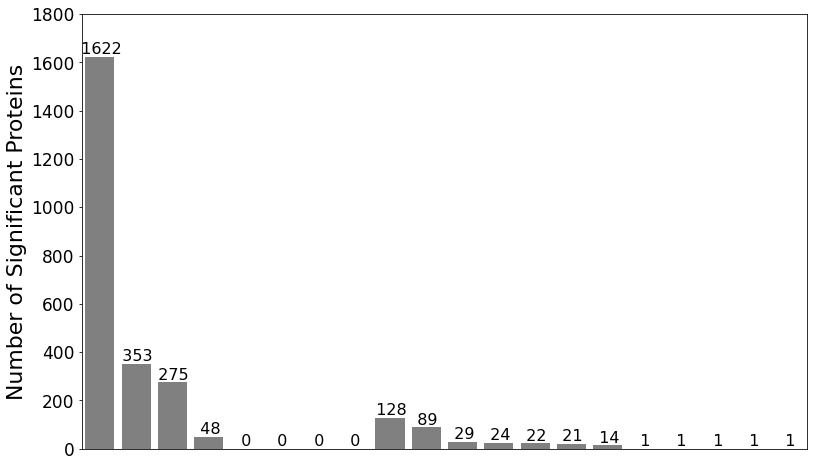

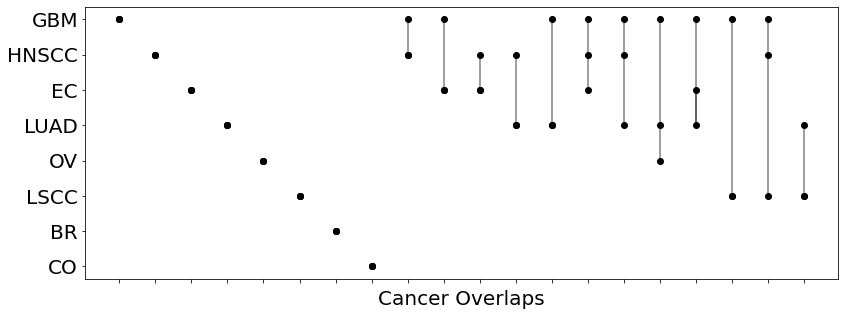

In [14]:
# Bar Plot
plt.figure(figsize=(13,8))
o = sns.barplot(x=both['cancer'], y=both['sig'], data=both, color='grey')
plt.setp(o.get_xticklabels(),rotation=90)

# Annotate count of sig genes above each bar
for p in o.patches:
    o.annotate('  {:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 16)

o.set(ylim=(0, 1800))
o.set_xlabel('', size = 17)
o.set_ylabel('Number of Significant Proteins', size = 22)
o.get_xaxis().set_visible(False) # Hide x-axis
o.yaxis.set_tick_params(labelsize=17)



# Dumbell Plot
# Create vertical dumbell plot using scatterplots
plt.rcParams.update({'font.size': 20})
d = plt.figure(figsize=(13.5,5))
my_range=range(1,len(ordered_df.index)+1) #range count for x axis num
d = plt.vlines(x=my_range, ymin=ordered_df['y1'], ymax=ordered_df['y2'], color='black', alpha=0.5) #vertical lines
d = plt.vlines(x=my_range, ymin=ordered_df['y2'], ymax=ordered_df['y3'], color='black', alpha=0.5)
d = plt.scatter(my_range, ordered_df['y1'], color='black', alpha=1) #plots first point
d = plt.scatter(my_range, ordered_df['y2'], color='black', alpha=1) # plots second point
d = plt.scatter(my_range, ordered_df['y3'], color='black', alpha=1) # plots third point

# Add title and axis names
labels = list(ordered_df.index[:8]) # label 8 single cancer names y axis
labels.reverse()
plt.xticks(my_range, []) #none for x axis
plt.yticks(range(0,8), labels) # single cancer names
#plt.ylabel('Cancer')
plt.xlabel('Cancer Overlaps')

o.figure.savefig("PTEN_Fig_1B_barplot.png", dpi = 300)
d.figure.savefig("PTEN_Fig_1B_dumbell.png", dpi = 300)

* NOTE: Lscc has 3 significant genes that are also significnat in other cancers. They are only counted in the overlapping columns and Lscc alone shows 0 unique genes. (See columns: Gbm_Hnscc_Lscc, Gbm_Lscc, Luad_Lscc) 

# Get total number of genes significant in at least one cancer

In [6]:
#Keep trans genes that are significant in at least 1 cancer. 
total = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
total_count = len(total.Proteomics.unique())
print('Total significant genes in at least one cancer:', total_count)

Total significant genes in at least one cancer: 2630


# Calculate percentage of genes significant in only one cancer

In [10]:
#Keep trans genes that are significant in 1 cancer. 
one = all_df[all_df['Num_sig'].isin([1])]
one_count = len(one.Proteomics.unique())
print('Significant genes in only one cancer:', one_count)
print('Percent:', one_count / total_count * 100)

Significant genes in only one cancer: 2298
Percent: 87.3764258555133


# Calculate percentage of genes significant in multiple cancers

In [11]:
#Keep trans genes that are significant in multiple cancers. 
mult = all_df[all_df['Num_sig'].isin([2,3])]
mult_count = len(mult.Proteomics.unique())
print('Significant genes in multiple cancers:', mult_count)
print('Percent:', mult_count / total_count * 100)

Significant genes in multiple cancers: 332
Percent: 12.623574144486692


In [12]:
# check 3 lscc sig genes
l = all_df.loc[all_df['Lscc_P_Value'] < 0.05]
l[['Proteomics', 'Lscc_P_Value', 'Gbm_P_Value', 'Hnscc_P_Value', 'Luad_P_Value','sig']]

,Proteomics,Lscc_P_Value,Gbm_P_Value,Hnscc_P_Value,Luad_P_Value,sig
420,ATAD1,0.000006,0.005723,0.031703,0.195221,Gbm_Hnscc_Lscc
48,VPS26A,0.047096,0.000622,0.932416,0.085454,Gbm_Lscc
6524,BTAF1,0.001136,0.460174,0.080719,0.012853,Luad_Lscc
